In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Data link: https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset

In [3]:
df = pd.read_csv('spam.csv')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


## Data cleaning 

In [5]:
df.shape

(5572, 5)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
# drop last 3 columns
df.drop(columns = ['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace = True)

In [7]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
# rename the columns 
df.rename(columns = {'v1': 'target','v2':'text'},inplace = True)
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [11]:
df['target'] = le.fit_transform(df['target'])

In [12]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
# check for missing values
df.isna().sum()

target    0
text      0
dtype: int64

In [15]:
# check for duplicate values
df.duplicated().sum()

403

In [18]:
# remove duplicates
df = df.drop_duplicates(keep = 'first')

In [19]:
df.duplicated().sum()

0

In [20]:
df.shape

(5169, 2)

## EDA

In [21]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [23]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

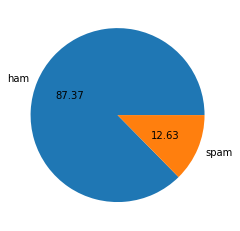

In [26]:
plt.pie(df['target'].value_counts(),labels = ['ham','spam'],autopct= "%0.2f")
plt.show()

#### Data is imbalanced

In [27]:
!pip install nltk

In [28]:
import nltk

In [68]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/asjad0256/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [30]:
# number of characters
df['num_characters'] = df['text'].apply(len)
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [34]:
#get number of words
df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [38]:
df['num_sentences'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [40]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.923776,18.456375,1.962275
std,58.174846,13.323322,1.433892
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [41]:
#ham 
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.456820,17.123339,1.815545
std,56.356802,13.491315,1.364098
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [42]:
#spam
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.479326,27.675345,2.977029
std,30.014336,7.011513,1.493676
min,13.000000,2.000000,1.000000
25%,131.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,46.000000,9.000000


<AxesSubplot:xlabel='num_characters', ylabel='Count'>

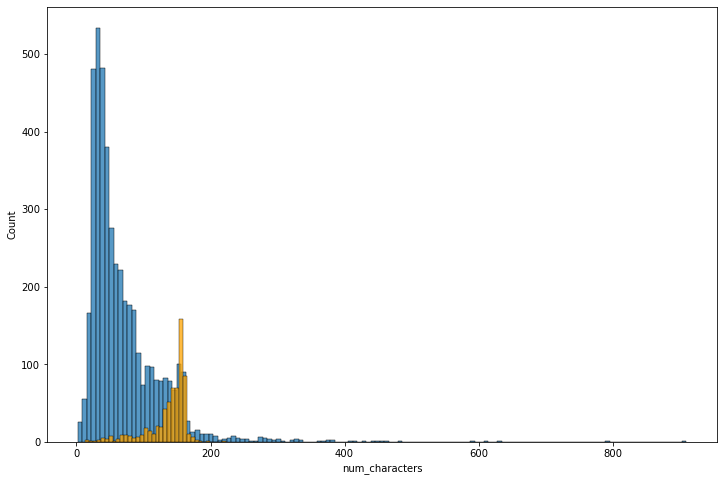

In [47]:
plt.figure(figsize = (12,8))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color = 'orange')

<AxesSubplot:xlabel='num_words', ylabel='Count'>

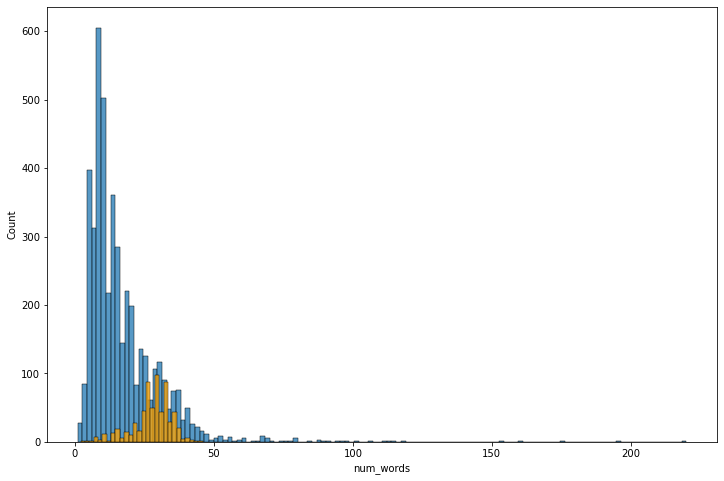

In [48]:
plt.figure(figsize = (12,8))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color = 'orange')

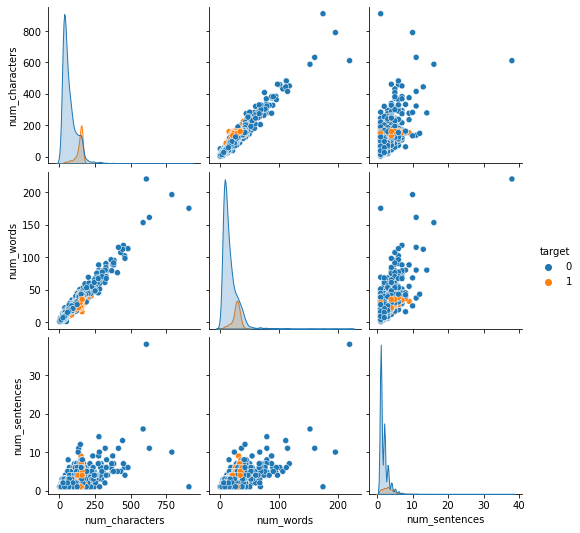

In [49]:
sns.pairplot(df,hue = 'target')

In [50]:
df.corr()

,target,num_characters,num_words,num_sentences
target,1.000000,0.382785,0.263143,0.269132
num_characters,0.382785,1.000000,0.966087,0.626197
num_words,0.263143,0.966087,1.000000,0.680924
num_sentences,0.269132,0.626197,0.680924,1.000000


<AxesSubplot:>

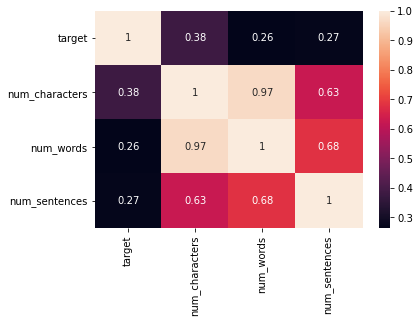

In [51]:
sns.heatmap(df.corr(),annot = True)

## Data Preprocessing
#### * Lower case
#### * Tokenization
#### * Removing special characters
#### * Removing stopwords and punctuation
#### * Stemming

In [69]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/asjad0256/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [76]:
import string
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [78]:
ps = PorterStemmer()
ps.stem('danced')

'danc'

In [85]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    text = y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    
    text = y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
    
    return " ".join(y)


In [88]:
transform_text(
'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...')

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [87]:
df['text'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [91]:
df['transformed_text'] = df['text'].apply(transform_text)
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [93]:
!pip install wordcloud

     |████████████████████████████████| 158 kB 538 kB/s eta 0:00:01


In [95]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [97]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep = " "))

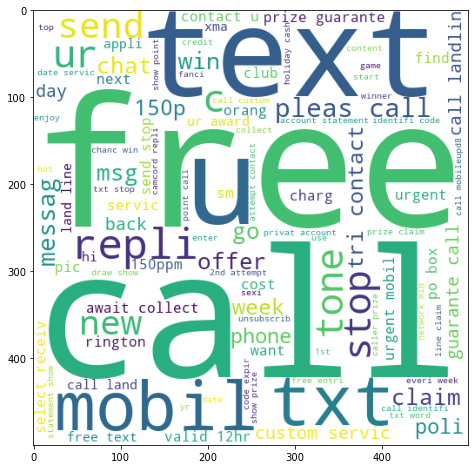

In [99]:
plt.figure(figsize = (15,8))
plt.imshow(spam_wc)

In [100]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep = " "))

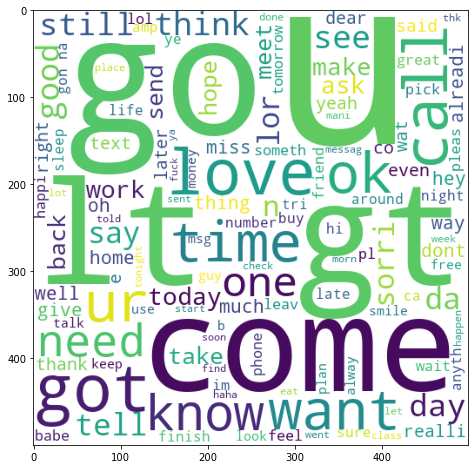

In [101]:
plt.figure(figsize = (15,8))
plt.imshow(ham_wc)

In [119]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].to_list():
    for word in msg.split():
        spam_corpus.append(word)

In [120]:
len(spam_corpus)

9941

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


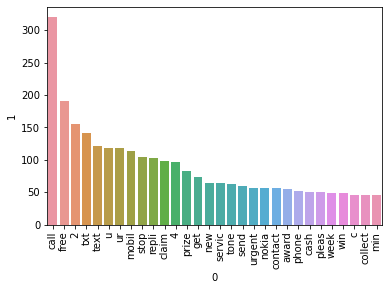

In [121]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation = 'vertical')
plt.show()

In [122]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].to_list():
    for word in msg.split():
        ham_corpus.append(word)

In [123]:
len(ham_corpus)

35303

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


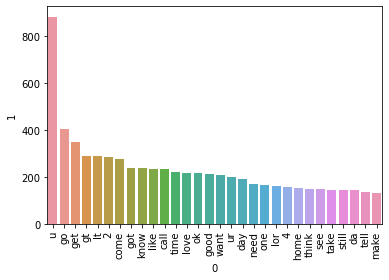

In [124]:
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation = 'vertical')
plt.show()

## Model Building

In [150]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer()

In [151]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [152]:
X.shape

(5169, 6677)

In [153]:
y = df['target'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [154]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state = 2)

In [155]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4135, 6677)
(1034, 6677)
(4135,)
(1034,)


In [156]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix,precision_score

In [157]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [158]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.874274661508704
[[791 105]
 [ 25 113]]
0.518348623853211


In [159]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9593810444874274
[[896   0]
 [ 42  96]]
1.0


In [160]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.971953578336557
[[894   2]
 [ 27 111]]
0.9823008849557522


In [161]:
# choosen tfidf-->MNB because precision is 1

### Lets see some other algorithms and compare their performance

In [174]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [178]:
svc = SVC(kernel = 'sigmoid',gamma = 0.1)
knc = KNeighborsClassifier()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear',penalty = 'l1')
rfc = RandomForestClassifier(n_estimators=50,random_state=2)
abc = AdaBoostClassifier(n_estimators=50,random_state=2)
bc = BaggingClassifier(n_estimators=50,random_state=2)
etc = ExtraTreesClassifier(n_estimators=50,random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators= 50, random_state= 2)

In [179]:
clfs = {
    'SVC': svc,
    'KN' : knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'BgC': bc,
    'ETC': etc,
    'GBDT': gbdt,
    'xgb': xgb
}

In [180]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy , precision

In [182]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9110251450676983, 0.9791666666666666)

In [183]:
accuracy_scores = []
precision_scores = []

for name, clf in clfs.items():
    current_accuracy,current_precision = train_classifier(clf,X_train,y_train,X_test,y_test)
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

In [184]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision': precision_scores}).sort_values('Precision',ascending = False)
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.900387,1.000000
2,NB,0.959381,1.000000
8,ETC,0.977756,0.991453
5,RF,0.970019,0.990826
0,SVC,0.911025,0.979167
6,AdaBoost,0.962282,0.954128
10,xgb,0.971954,0.950413
4,LR,0.951644,0.940000
9,GBDT,0.951644,0.931373
7,BgC,0.957447,0.861538


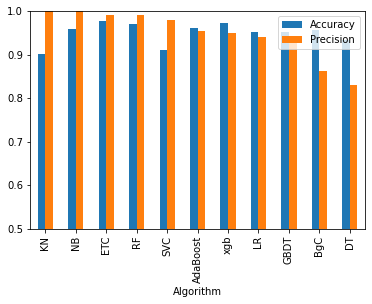

In [192]:
performance_df.plot(x = 'Algorithm', y = ['Accuracy','Precision'],kind = 'bar')
plt.ylim(0.5,1.0)
plt.xticks(rotation = 'vertical')
plt.show()

### lets limit max_features in tfidf to 3000

In [226]:
tfidf = TfidfVectorizer(max_features= 3000)

In [227]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [228]:
X.shape

(5169, 3000)

In [196]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state = 2)

In [197]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4135, 3000)
(1034, 3000)
(4135,)
(1034,)


In [198]:
accuracy_scores_3000 = []
precision_scores_3000 = []

for name, clf in clfs.items():
    current_accuracy,current_precision = train_classifier(clf,X_train,y_train,X_test,y_test)
    accuracy_scores_3000.append(current_accuracy)
    precision_scores_3000.append(current_precision)

In [200]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_3000':accuracy_scores_3000,'Precision_3000': precision_scores_3000}).sort_values('Precision_3000',ascending = False)
temp_df

,Algorithm,Accuracy_3000,Precision_3000
1,KN,0.905222,1.000000
2,NB,0.971954,1.000000
5,RF,0.975822,0.982906
8,ETC,0.979691,0.975610
0,SVC,0.927466,0.970149
4,LR,0.956480,0.969697
6,AdaBoost,0.961315,0.945455
10,xgb,0.968085,0.933884
9,GBDT,0.946809,0.927835
7,BgC,0.959381,0.869231


In [201]:
performance_df.merge(temp_df, on = 'Algorithm',)

,Algorithm,Accuracy,Precision,Accuracy_3000,Precision_3000
0,KN,0.900387,1.000000,0.905222,1.000000
1,NB,0.959381,1.000000,0.971954,1.000000
2,ETC,0.977756,0.991453,0.979691,0.975610
3,RF,0.970019,0.990826,0.975822,0.982906
4,SVC,0.911025,0.979167,0.927466,0.970149
5,AdaBoost,0.962282,0.954128,0.961315,0.945455
6,xgb,0.971954,0.950413,0.968085,0.933884
7,LR,0.951644,0.940000,0.956480,0.969697
8,GBDT,0.951644,0.931373,0.946809,0.927835
9,BgC,0.957447,0.861538,0.959381,0.869231


## So by seeing above data we can choose Multionomial Naive bayes 

### lets see some predictions 

In [229]:
def predict(text):
    transformed_text = transform_text(text)
    x = tfidf.transform([transformed_text])
    pred = mnb.predict(x)[0]
    if(pred == 1):
        return "spam"
    else:
        return "not_spam"

In [232]:
predict("Hi How are you should we go for movie today evening")

'not_spam'

In [235]:
predict("Free entry in 2 a wkly comp to win FA Cup fina...")

'spam'

In [236]:
predict("SIX chances to win CASH! From 100 to 20,000 po...")

'spam'

In [239]:
predict("Even my brother is not like to speak with me. ...")

'not_spam'

In [240]:
predict("The guy did some bitching but I acted like i'd...")

'not_spam'

In [241]:
predict("congratulations you have won cash prize of 1000$ enter otp on this number")

'spam'